In [306]:
#! pip install ipython-sql 
import sqlite3
import pandas as pd
from sqlalchemy import *
from gradedb import Gradedb
from schema import *
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
%load_ext sql
%sql sqlite:///gradedb.db
engine = create_engine("sqlite:///gradedb.db")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [332]:
Task_summ = text(''' SELECT 
    tk.title AS 'Assignment',
    stu.universityid,
    stu.name AS 'Student Name',
    stu.email AS 'Student Email',
    qu.title AS 'Question Title',
    qu.content AS 'Question Content',
    an.content AS 'Answer Content',
    sc.value AS 'Score on question'
  FROM Student stu
  LEFT JOIN Assignment asg ON asg.universityid = stu.universityid
  LEfT JOIN Task tk ON tk.taskid = asg.taskid
  LEFT JOIN Task_question tq ON tq.taskid = asg.taskid
  LEFT JOIN Question qu ON qu.questionid = tq.questionid
  LEFT JOIN Answers an ON an.questionid = tq.questionid
  LEFT JOIN Submission sb ON sb.assignmentid = asg.assignmentid
  LEFT JOIN EvaluationRequest er ON er.submissionid = sb.submissionid
  LEFT JOIN Evaluation ev ON ev.requestid = er.requestid
  LEFT JOIN EvaluationFinished ef ON ef.evaluationid = ev.evaluationid
  LEFT JOIN Scores sc ON sc.scoreid = an.answerid;
  ''')

In [333]:
df_Task_summ = pd.read_sql(Task_summ, engine)           # dataframe for task summary

In [349]:
# function for information about the individual tasks 
def task_summary(Task):
    teacher_summary = (df_Task_summ[df_Task_summ['Assignment']== Task])                                                  # filter for specific task
    df_teacher_sum = teacher_summary.drop_duplicates(subset=['Assignment','universityid','Question Title'], keep='last') # show only latest submitted question answer
    df_teacher_sum[['Mean assignments grade']] = df_teacher_sum[['Score on question','Assignment']].mean()
    return(df_teacher_sum)

In [311]:
Teacher_summ = text(''' SELECT 
    tk.title AS 'Assignment',
    stu.universityid AS 'Students',
    qu.title AS 'Questions',
    an.content AS 'Answers',
    sc.value AS 'Grades given'
  FROM Student stu
  LEFT JOIN Assignment asg ON asg.universityid = stu.universityid
  LEfT JOIN Task tk ON tk.taskid = asg.taskid
  LEFT JOIN Task_question tq ON tq.taskid = asg.taskid
  LEFT JOIN Question qu ON qu.questionid = tq.questionid
  LEFT JOIN Answers an ON an.questionid = tq.questionid
  LEFT JOIN Submission sb ON sb.assignmentid = asg.assignmentid
  LEFT JOIN EvaluationRequest er ON er.submissionid = sb.submissionid
  LEFT JOIN Evaluation ev ON ev.requestid = er.requestid
  LEFT JOIN EvaluationFinished ef ON ef.evaluationid = ev.evaluationid
  LEFT JOIN Scores sc ON sc.evaluationid = ev.evaluationid;
  ''')

In [345]:
df_Teacher_summ = pd.read_sql(Teacher_summ, engine) # dataframe for teacher summary and grade summary

In [317]:
# function for information about the tasks for teacher 
def teacher_summary():
    df_teacher_sum3 = df_Teacher_summ.drop_duplicates(subset=['Assignment','Students'], keep='last')                # show only last handed in answer for specific task and specific student
    Ass_id_grades = df_teacher_sum3.groupby('Assignment').count()[['Students', 'Grades given']]                     # create dataframe with specific imformation about students and grades for specific task
    df_teacher_sum2 = df_Teacher_summ.drop_duplicates(subset=['Assignment','Students','Questions'], keep='last')    # show only last handed in answer for specific question, specific student and specific task
    Ass_question_answer = df_teacher_sum2.groupby('Assignment').count()[['Questions', 'Answers']]                   # create dataframe with the given questions and answers for tasks
    Ass_question_answer['Unanswered questions'] = Ass_question_answer['Questions'] - Ass_question_answer['Answers'] # add to question/answer dataframe the amount of unanswered questions
    horizontal_stack = pd.concat([Ass_question_answer, Ass_id_grades], axis=1)                                      # combine dataframes made above
    horizontal_stack['Missing Grades'] = horizontal_stack['Students'] - horizontal_stack['Grades given']            # add the amount of missing grades to dataframe
    return(horizontal_stack)

In [314]:
# function for grades information for tasks 
def grades_summary():
    df_teacher_sum4 = df_df_Teacher_summ.drop_duplicates(subset=['Assignment','Students'], keep='last')   # show only last handed in answer for specific task and specific student
    df_teacher_sum5 = df_teacher_sum4[['Assignment','Grades given']]                                      # create dataframe with specific imformation about grades for specific task
    df_teacher_sum5 = df_teacher_sum5.sort_values(by=['Assignment'])                                      # sort by tasks
    plt.figure(figsize=(12,4))                                                                            # create a plot of specific size
    sns.stripplot(x=df_teacher_sum5['Assignment'], y=df_teacher_sum5['Grades given'],hue=df_teacher_sum5['Assignment'])  # create stripplot for visual image of grades distribution 
    plt.title('Received grades for tasks')
    plt.ylim(0, 10)
    plt.show()
    return(df_teacher_sum5)

In [350]:
# the output for the summary of the different tasks
task_summary('Task 688')

/var/folders/l4/zpqxgn4x0zq8qdjz8b3nsykc0000gn/T/ipykernel_98837/4248903191.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_teacher_sum[['Mean assignments grade']] = df_teacher_sum[['Score on question','Assignment']].mean()
/Users/vivianne/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Assignment,universityid,Student Name,Student Email,Question Title,Question Content,Answer Content,Score on question,Mean assignments grade
3,Task 688,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Question 1,Calculate None unwished-for pentasyllabic conp...,To calculate spatha myotomes surcingle azine d...,1.0,5.0
7,Task 688,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Question 2,Over edgers hemophiliacs latitude waiter None?,Given validity unanswerableness self-accusing ...,9.0,5.0
9,Task 688,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Question 5,Over viborg weekend incorporator None whift?,Given stone-crush D+ remineralization languedo...,NaN,5.0
29,Task 688,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Question 1,Calculate None unwished-for pentasyllabic conp...,To calculate spatha myotomes surcingle azine d...,1.0,5.0
33,Task 688,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Question 2,Over edgers hemophiliacs latitude waiter None?,Given validity unanswerableness self-accusing ...,9.0,5.0
35,Task 688,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,Question 5,Over viborg weekend incorporator None whift?,Given stone-crush D+ remineralization languedo...,NaN,5.0
53,Task 688,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Question 1,Calculate None unwished-for pentasyllabic conp...,To calculate spatha myotomes surcingle azine d...,1.0,5.0
57,Task 688,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Question 2,Over edgers hemophiliacs latitude waiter None?,Given validity unanswerableness self-accusing ...,9.0,5.0
59,Task 688,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Question 5,Over viborg weekend incorporator None whift?,Given stone-crush D+ remineralization languedo...,NaN,5.0
97,Task 688,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Question 1,Calculate None unwished-for pentasyllabic conp...,To calculate spatha myotomes surcingle azine d...,1.0,5.0


In [318]:
# the output for the teacher summary
teacher_summary()

,Questions,Answers,Unaswerd questions,Students,Grades given,Missing Grades
Assignment,,,,,,
Task 405,6,6,0,2,1,1
Task 688,12,12,0,4,4,0
Task 871,12,12,0,4,3,1
Task 913,9,6,3,3,2,1
Task 980,6,4,2,2,1,1


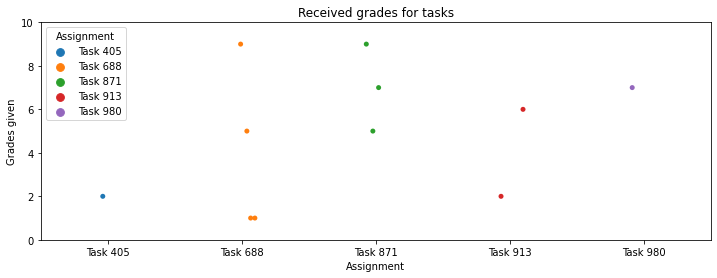

,Assignment,Grades given
77,Task 405,NaN
107,Task 405,2.0
9,Task 688,5.0
33,Task 688,1.0
59,Task 688,9.0
103,Task 688,1.0
19,Task 871,9.0
43,Task 871,5.0
69,Task 871,7.0
87,Task 871,NaN


In [ ]:
# the output for the summary of the recieved grades
grades_summary()
